# **FUZZY C-MEANS**

## FUZZY C-MEANS CLUSTERING

Fuzzy C-Means (FCM) adalah metode pengelompokan data yang mirip dengan *K-Means*, namun lebih fleksibel dalam menentukan keanggotaan data terhadap sebuah cluster. Berbeda dengan pendekatan *K-Means* yang hanya memperbolehkan satu data menjadi bagian dari satu cluster secara pasti (*hard clustering*), FCM menerapkan pendekatan *soft clustering*, di mana setiap data dapat memiliki tingkat kedekatan (derajat keanggotaan) terhadap lebih dari satu cluster sekaligus.

Dalam FCM, suatu data tidak langsung diklasifikasikan ke dalam satu cluster saja, melainkan diberi bobot keanggotaan untuk tiap cluster. Bobot ini menunjukkan seberapa dekat data tersebut terhadap pusat cluster (*centroid*). Semakin besar nilai keanggotaannya, semakin besar kemungkinan data tersebut berada di dekat centroid tersebut. Nilai-nilai keanggotaan ini berada di antara 0 hingga 1, dan jumlah totalnya untuk setiap data terhadap seluruh cluster harus sama dengan 1.

### KONSEP UTAMA FUZZY C-MEANS

Fuzzy C-Means mengandalkan konsep keanggotaan yang bersifat numerik dan berskala, bukan kategorikal. Derajat keanggotaan menunjukkan proporsi kedekatan suatu data terhadap tiap cluster yang ada. Dengan kata lain, FCM memberikan representasi yang lebih halus dalam pengelompokan, sehingga lebih tepat digunakan ketika batas antar kelompok data tidak terlalu jelas atau bersifat kabur.

Dalam FCM, terdapat beberapa komponen penting:

* Data Point: Objek-objek yang akan diklasterkan.
* Centroid: Titik pusat dari setiap cluster.
* Fuzzy Membership Matrix (U): Matriks yang berisi nilai keanggotaan dari setiap data terhadap setiap cluster.
* Parameter Fuzziness (m): Nilai konstanta yang mengatur tingkat keburaman (biasanya m = 2). Semakin besar nilai m, semakin kabur keanggotaan suatu data pada cluster.


### ALGORITMA FUZZY C-MEANS CLUSTERING

Proses kerja algoritma Fuzzy C-Means adalah sebagai berikut:

1. Inisialisasi:

   * Tentukan jumlah cluster (*c*), parameter fuzziness (*m*), batas toleransi error (*ε*), dan nilai maksimum iterasi.
   * Inisialisasi *membership matrix* $U_{ij}$ secara acak, dengan syarat:

     $$
     \sum_{j=1}^c U_{ij} = 1, \quad \forall i
     $$

2. Hitung Centroid Tiap Cluster:

   $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$

   Di mana:

   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j

3. Update Membership Matrix:

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

4. Pengecekan Konvergensi:

   * Jika perubahan nilai *membership matrix* kurang dari ε atau sudah mencapai iterasi maksimum, maka proses dihentikan.
   * Jika belum, kembali ke langkah 2.

## CONTOH MANUAL PERHITUNGAN FUZZY C-MEANS CLUSTERING

Berikut adalah contoh lengkap **perhitungan manual Fuzzy C-Means (FCM)** hingga konvergen, disertai dengan perhitungan **fungsi objektifnya**. Agar mudah dipahami, kita akan gunakan:


**Data:**
Misalnya kita punya 4 data satu dimensi:

$$
X = \{3, 4, 10, 11\}
$$

### **Langkah 1: Inisialisasi Matriks Keanggotaan $U^{(0)}$**

$$
U^{(0)} =
\begin{bmatrix}
0.5 & 0.6 & 0.3 & 0.2 \\
0.5 & 0.4 & 0.7 & 0.8 \\
\end{bmatrix}
$$

Sudah memenuhi syarat: kolom-kolomnya dijumlahkan = 1.


### **Langkah 2: Hitung Centroid Awal**

Gunakan:

$$
v_j = \frac{\sum u_{ji}^m \cdot x_i}{\sum u_{ji}^m}
$$

#### Untuk Cluster 1:

$$
v_1 = \frac{(0.5^2 \cdot 3) + (0.6^2 \cdot 4) + (0.3^2 \cdot 10) + (0.2^2 \cdot 11)}{0.5^2 + 0.6^2 + 0.3^2 + 0.2^2}
= \frac{0.75 + 1.44 + 0.9 + 0.44}{0.25 + 0.36 + 0.09 + 0.04}
= \frac{3.53}{0.74}
\approx 4.770
$$

#### Untuk Cluster 2:

$$
v_2 = \frac{(0.5^2 \cdot 3) + (0.4^2 \cdot 4) + (0.7^2 \cdot 10) + (0.8^2 \cdot 11)}{0.5^2 + 0.4^2 + 0.7^2 + 0.8^2}
= \frac{0.75 + 0.64 + 4.9 + 7.04}{0.25 + 0.16 + 0.49 + 0.64}
= \frac{13.33}{1.54}
\approx 8.658
$$

### **Langkah 3: Update Keanggotaan**

#### Untuk \$x\_1 = 3\$:

* \$d\_1 = |3 - 4.770| = 1.770\$
* \$d\_2 = |3 - 8.658| = 5.658\$

$$
u_{1,1} = \frac{1}{1 + \left(\frac{1.770}{5.658}\right)^2}
= \frac{1}{1 + 0.098}
\approx 0.911
$$

$$
u_{2,1} = 1 - 0.911 = 0.089
$$

Lanjutkan untuk data lainnya.

### **Langkah 4: Cek Konvergensi dan Lanjutkan Iterasi**

Misal hasil centroid setelah iterasi ke-2:

* \$v\_1 = 3.962\$
* \$v\_2 = 10.438\$

Bandingkan dengan sebelumnya. Jika semua perubahan < 0.01, selesai. Jika belum, lanjutkan iterasi.

### **Tabel Hasil Iterasi dan Konvergensi:**

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif \$J\_m\$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | -----------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     4.7701 |     8.6584 |                  12.2417 |  0.5000 |  0.6000 |  0.3000 |  0.2000 |  0.5000 |  0.4000 |  0.7000 |  0.8000 |
|       2 |     3.9624 |    10.4382 |                   2.9844 |  0.9112 |  0.9281 |  0.1013 |  0.0622 |  0.0888 |  0.0719 |  0.8987 |  0.9378 |
|       3 |     3.8234 |    10.4950 |                   1.2028 |  0.9833 |  0.9901 |  0.0235 |  0.0102 |  0.0167 |  0.0099 |  0.9765 |  0.9898 |
|       4 |     3.8195 |    10.4997 |                   1.2007 |  0.9866 |  0.9912 |  0.0211 |  0.0088 |  0.0134 |  0.0088 |  0.9789 |  0.9912 |

### ✅ **Konvergen pada Iterasi ke-4**

* Perubahan centroid sudah < 0.01

### 📌 **Hasil Akhir dan Interpretasi:**

* **Centroid akhir:**

  * Cluster 1: ≈ 3.8195 → Data {3, 4}
  * Cluster 2: ≈ 10.4997 → Data {10, 11}

* **Fungsi objektif \$J\_m\$** turun secara signifikan tiap iterasi:
  12.24 → 2.98 → 1.20 → 1.20 (stabil)

## IMPLEMENTASI PYTHON

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

In [17]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([3, 4, 10, 11])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.5, 0.6, 0.3, 0.2],
    [0.5, 0.4, 0.7, 0.8]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,4.7703,8.6558,20.8785,0.5000,0.6000,0.3000,0.200,0.5000,0.4000,0.7000,0.800
1,2,3.6110,10.4272,2.3305,0.9108,0.9734,0.0620,0.124,0.0892,0.0266,0.9380,0.876
2,3,3.5017,10.4990,0.9956,0.9933,0.9963,0.0045,0.006,0.0067,0.0037,0.9955,0.994



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [18]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

## Library yang digunakan

In [19]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisahkan Outliernya

In [20]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa          14.0          2.0          41.0         32.0             -1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa          13.0          2.0          40.0         56.0             -1
  4     Iris-setosa          15.0          2.0          23.0         47.0             -1
  5     Iris-setosa          14.0          2.0          38.0         52.0             -1
  6     Iris-setosa           1.7          0.4           3.5          4.2              1
  7     Iris-setosa           1.4          0.3           3.5          5.7              1
  8     Iris-setosa           1.5          0.2           4.5          5.0              1
  9     Iris-setosa           1.4          0.2           4.3          5.4              1
 10     Iris-setosa           1.5          0.1           3.5          4.5              1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier dan tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

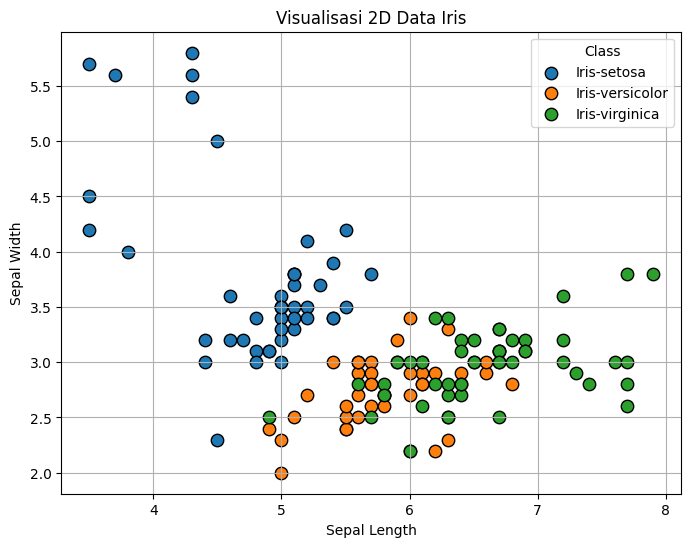

In [21]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

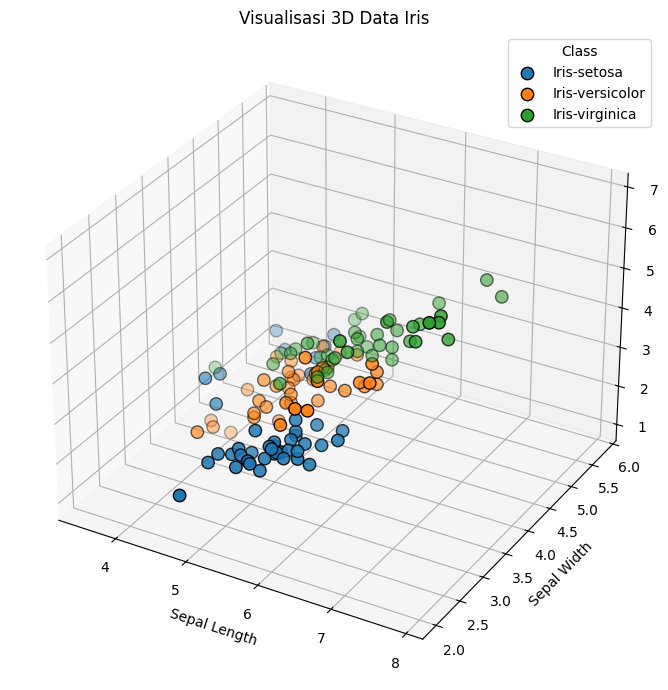

In [22]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

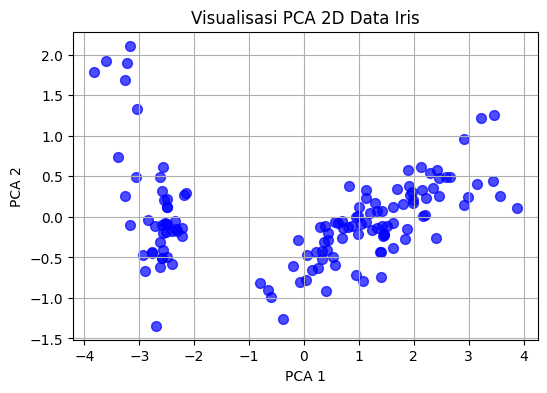

In [23]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

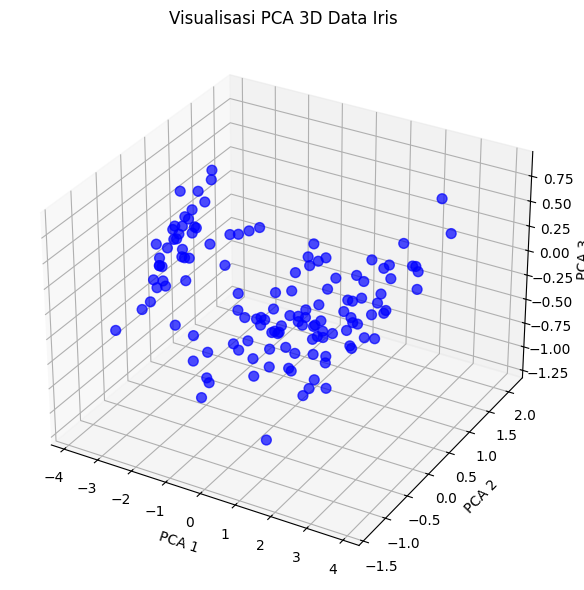

In [24]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Disini saya juga melakukan normalisasi menggunakan MinMaxScaler sebagai upaya untuk menyamakan skala seluruh fitur dalam dataset. Langkah ini penting karena fitur-fitur dalam data saya memiliki rentang nilai yang berbeda-beda, yang dapat memengaruhi kinerja model machine learning, terutama algoritma yang bergantung pada perhitungan jarak seperti KNN atau SVM.

MinMaxScaler bekerja dengan cara mengubah setiap nilai dalam fitur ke dalam rentang antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan skala yang seragam, algoritma dapat lebih adil dalam memproses setiap fitur tanpa berat sebelah pada fitur yang memiliki nilai lebih besar.

Setelah proses ini diterapkan, saya mendapati bahwa model menjadi lebih stabil dan performanya meningkat. Dari sini saya belajar bahwa normalisasi bukan hanya soal teknis semata, melainkan juga bagian penting dari cara kita menjaga kualitas dan keandalan data yang akan digunakan dalam proses pembelajaran mesin.

In [25]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [26]:
print (scaled_features);

[[0.11864407 0.125      0.         0.57894737]
 [0.06779661 0.08333333 0.         0.97368421]
 [0.08474576 0.04166667 0.22727273 0.78947368]
 [0.06779661 0.04166667 0.18181818 0.89473684]
 [0.08474576 0.         0.         0.65789474]
 [0.08474576 0.04166667 0.18181818 0.94736842]
 [0.10169492 0.04166667 0.18181818 1.        ]
 [0.06779661 0.         0.06818182 0.52631579]
 [0.01694915 0.         0.04545455 0.94736842]
 [0.03389831 0.04166667 0.34090909 0.42105263]
 [0.08474576 0.125      0.34090909 0.39473684]
 [0.05084746 0.125      0.43181818 0.5       ]
 [0.06779661 0.08333333 0.36363636 0.39473684]
 [0.11864407 0.08333333 0.5        0.47368421]
 [0.08474576 0.08333333 0.36363636 0.47368421]
 [0.11864407 0.04166667 0.43181818 0.36842105]
 [0.08474576 0.125      0.36363636 0.44736842]
 [0.         0.04166667 0.25       0.42105263]
 [0.11864407 0.16666667 0.36363636 0.34210526]
 [0.15254237 0.04166667 0.29545455 0.36842105]
 [0.10169492 0.04166667 0.34090909 0.26315789]
 [0.10169492 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 2 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6277
Fuzzy Partition Coefficient (FPC): 0.8647
Objective Function Value (Jm): 8.6589
Cluster Centers (in scaled feature space):
[[0.09967035 0.08199149 0.313172   0.43143247]
 [0.67443549 0.67204974 0.63817313 0.23715315]]
Objective Function Values per Iteration:
Iterasi 01: 21.5245
Iterasi 02: 17.7707
Iterasi 03: 17.6180
Iterasi 04: 16.4247
Iterasi 05: 11.7592
Iterasi 06: 8.8007
Iterasi 07: 8.6610
Iterasi 08: 8.6590
Iterasi 09: 8.6589


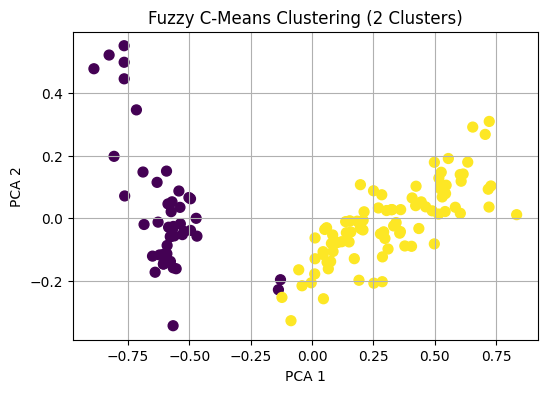

In [27]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6277
Fuzzy Partition Coefficient (FPC): 0.8647
Objective Function Value (Jm): 8.6589
Cluster Centers (in scaled feature space):
[[0.09967035 0.08199149 0.313172   0.43143247]
 [0.67443549 0.67204974 0.63817313 0.23715315]]
Objective Function Values per Iteration:
Iterasi 01: 21.5245
Iterasi 02: 17.7707
Iterasi 03: 17.6180
Iterasi 04: 16.4247
Iterasi 05: 11.7592
Iterasi 06: 8.8007
Iterasi 07: 8.6610
Iterasi 08: 8.6590
Iterasi 09: 8.6589


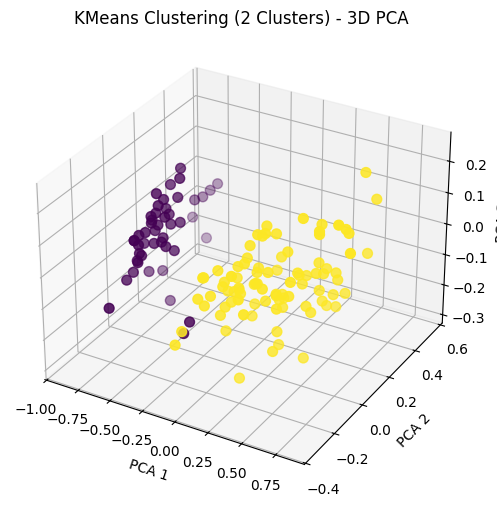

In [28]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 3 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.5017
Fuzzy Partition Coefficient (FPC): 0.7571
Objective Function Value (Jm): 4.6345
Cluster Centers (in scaled feature space):
[[0.77624931 0.81696734 0.73507168 0.27689886]
 [0.55684149 0.51555833 0.53242265 0.19941655]
 [0.08315313 0.0660255  0.31365224 0.4335243 ]]
Objective Function Values per Iteration:
Iterasi 01: 15.2584
Iterasi 02: 11.5518
Iterasi 03: 9.5843
Iterasi 04: 5.9270
Iterasi 05: 5.4748
Iterasi 06: 5.1620
Iterasi 07: 4.7783
Iterasi 08: 4.6527
Iterasi 09: 4.6363
Iterasi 10: 4.6347
Iterasi 11: 4.6345
Iterasi 12: 4.6345
Iterasi 13: 4.6345


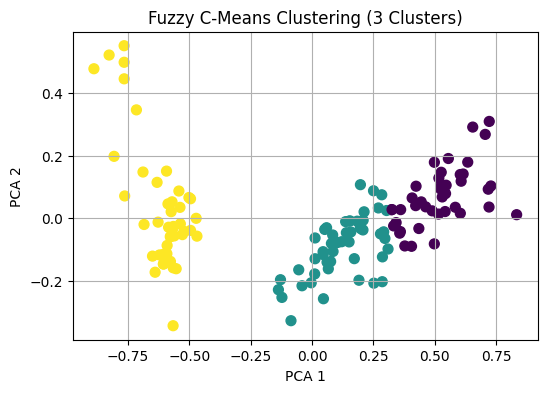

In [29]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.5017
Fuzzy Partition Coefficient (FPC): 0.7571
Objective Function Value (Jm): 4.6345
Cluster Centers (in scaled feature space):
[[0.77624931 0.81696734 0.73507168 0.27689886]
 [0.55684149 0.51555833 0.53242265 0.19941655]
 [0.08315313 0.0660255  0.31365224 0.4335243 ]]
Objective Function Values per Iteration:
Iterasi 01: 15.2584
Iterasi 02: 11.5518
Iterasi 03: 9.5843
Iterasi 04: 5.9270
Iterasi 05: 5.4748
Iterasi 06: 5.1620
Iterasi 07: 4.7783
Iterasi 08: 4.6527
Iterasi 09: 4.6363
Iterasi 10: 4.6347
Iterasi 11: 4.6345
Iterasi 12: 4.6345
Iterasi 13: 4.6345


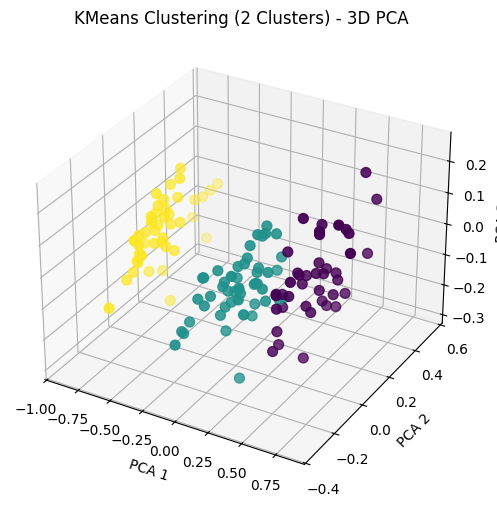

In [30]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 4 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4258
Fuzzy Partition Coefficient (FPC): 0.6623
Objective Function Value (Jm): 3.4912
Cluster Centers (in scaled feature space):
[[0.504088   0.46114313 0.48170723 0.17989396]
 [0.80162461 0.8575003  0.7693324  0.29455303]
 [0.08134431 0.064463   0.31925391 0.42541126]
 [0.65392345 0.64039459 0.61266189 0.23273289]]
Objective Function Values per Iteration:
Iterasi 01: 11.7473
Iterasi 02: 8.7996
Iterasi 03: 8.1002
Iterasi 04: 5.4180
Iterasi 05: 4.0697
Iterasi 06: 3.7273
Iterasi 07: 3.5685
Iterasi 08: 3.5161
Iterasi 09: 3.5003
Iterasi 10: 3.4951
Iterasi 11: 3.4931
Iterasi 12: 3.4922
Iterasi 13: 3.4918
Iterasi 14: 3.4915
Iterasi 15: 3.4914
Iterasi 16: 3.4913
Iterasi 17: 3.4913
Iterasi 18: 3.4913
Iterasi 19: 3.4912
Iterasi 20: 3.4912
Iterasi 21: 3.4912
Iterasi 22: 3.4912


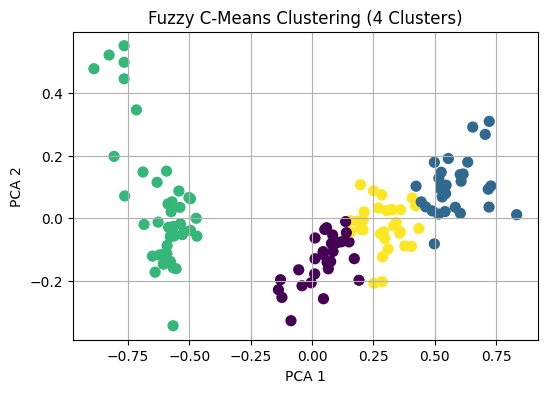

In [31]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4258
Fuzzy Partition Coefficient (FPC): 0.6623
Objective Function Value (Jm): 3.4912
Cluster Centers (in scaled feature space):
[[0.504088   0.46114313 0.48170723 0.17989396]
 [0.80162461 0.8575003  0.7693324  0.29455303]
 [0.08134431 0.064463   0.31925391 0.42541126]
 [0.65392345 0.64039459 0.61266189 0.23273289]]
Objective Function Values per Iteration:
Iterasi 01: 11.7473
Iterasi 02: 8.7996
Iterasi 03: 8.1002
Iterasi 04: 5.4180
Iterasi 05: 4.0697
Iterasi 06: 3.7273
Iterasi 07: 3.5685
Iterasi 08: 3.5161
Iterasi 09: 3.5003
Iterasi 10: 3.4951
Iterasi 11: 3.4931
Iterasi 12: 3.4922
Iterasi 13: 3.4918
Iterasi 14: 3.4915
Iterasi 15: 3.4914
Iterasi 16: 3.4913
Iterasi 17: 3.4913
Iterasi 18: 3.4913
Iterasi 19: 3.4912
Iterasi 20: 3.4912
Iterasi 21: 3.4912
Iterasi 22: 3.4912


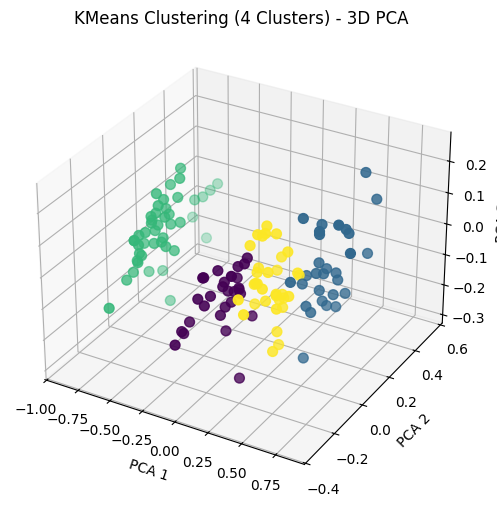

In [32]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
